##### Submitted by: Tan Huimin Sherry (p7319739)

##### Please note that Part A is on a separate Jupyter notebook included in the zip file submission.


# Assignment 1
## Part B - Facebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('dataset_Facebook.csv', sep = ';')

### Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

There are missing values in 'Paid', 'like' and 'share' which will be filled later.

In [4]:
attributes = ['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid']
outcomes = ['Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions']

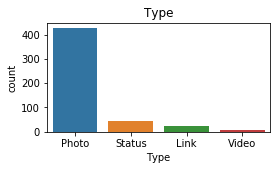

In [5]:
#visualize distribution of categorical variables
for col in df.select_dtypes(exclude=[np.number]).columns.tolist():
    plt.figure(figsize=(4,2))
    sns.countplot(df[col])
    plt.title(col)

/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


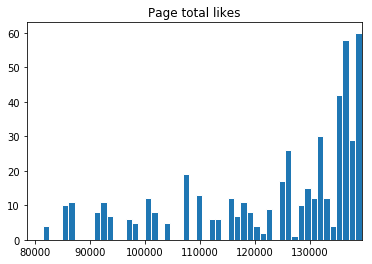

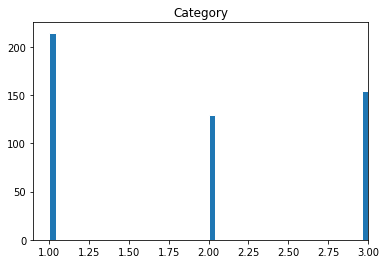

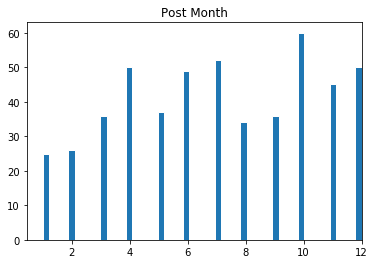

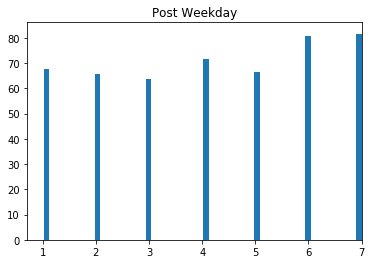

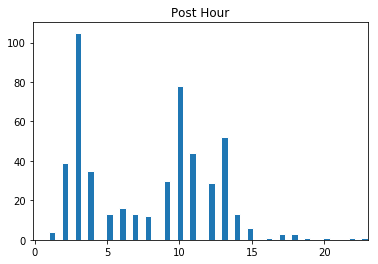

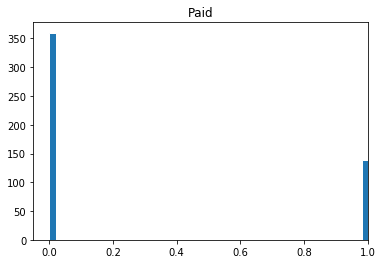

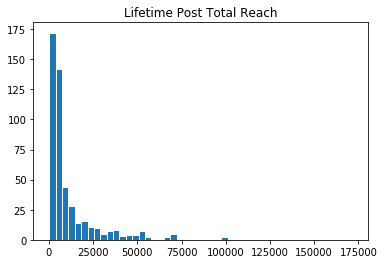

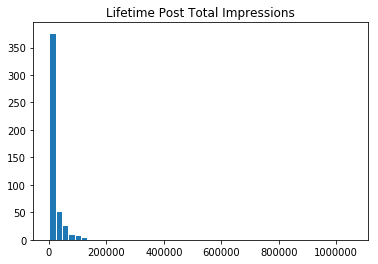

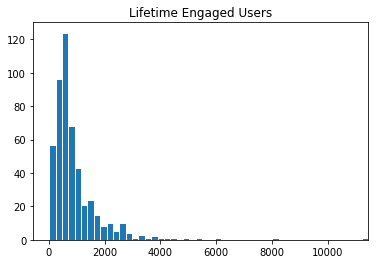

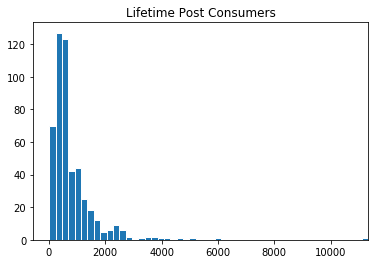

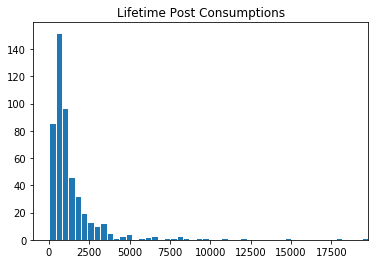

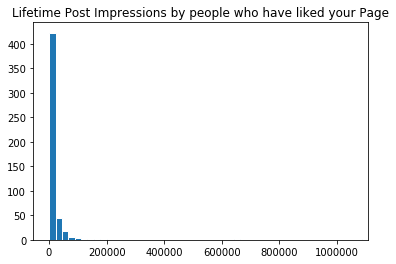

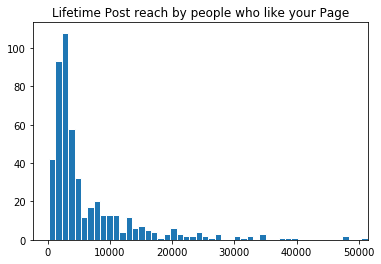

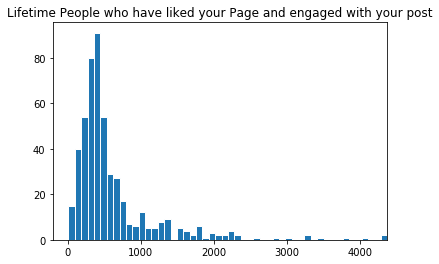

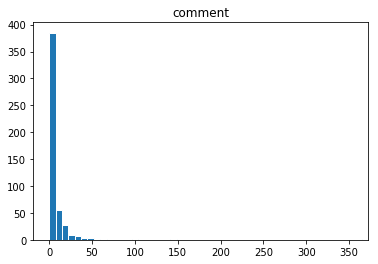

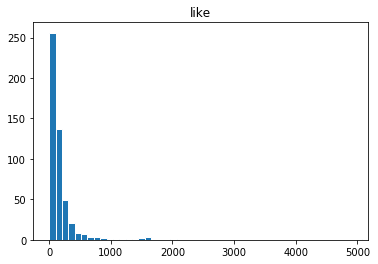

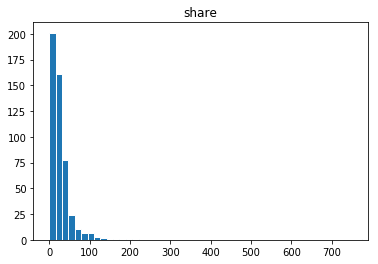

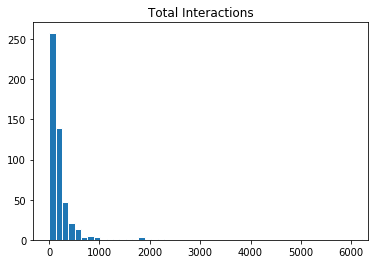

In [6]:
#visualize distributions of numerical variables
for col in df.select_dtypes(include=[np.number]).columns.tolist():
    fig, ax = plt.subplots()
    fig = plt.hist(df[col], bins=50, edgecolor='white')
    ax.set_xlim(right=df[col].max())
    plt.title(col)

In [7]:
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


Based on the visualizations, we can infer that:
- the distributions of the output variables are extremely right skewed. 
- the majority of posts are of type 'Photo' 
- posts are relatively uniformly distributed over different days of the week
- there are very few posts from 3pm - 1am. 
- 3am and 10am have more posts compared to other times
- there are relatively fewer number of posts in Jan - Feb compared to other months

For the purpose of this assignment, the output variables 'Lifetime Post Consumers' and 'Lifetime Engaged Users' will be selected for prediction modelling.

In [8]:
selected_outcomes = ['Lifetime Post Consumers', 'Lifetime Engaged Users']

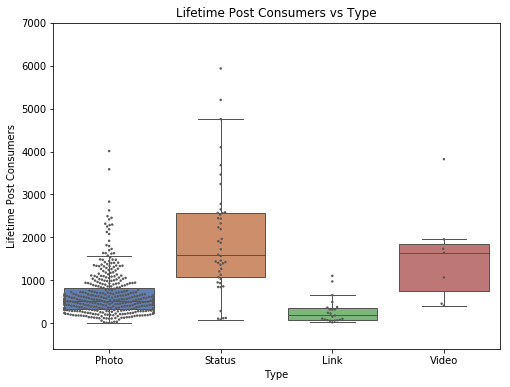

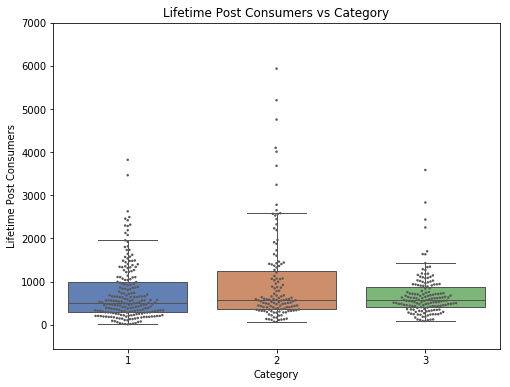

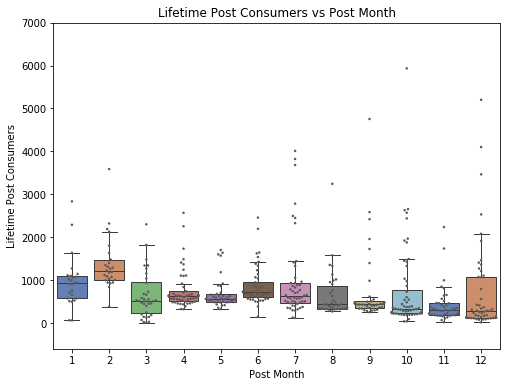

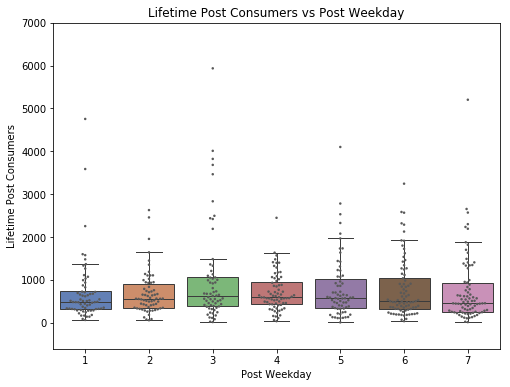

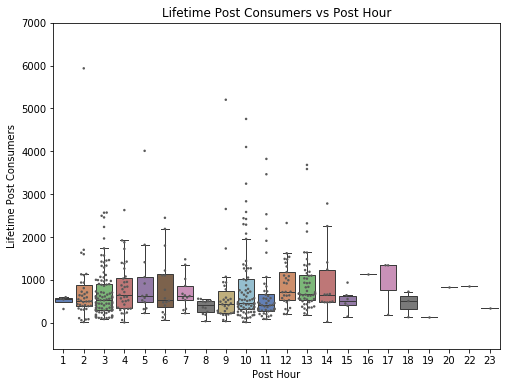

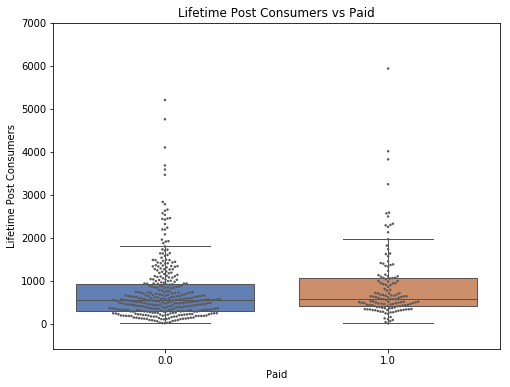

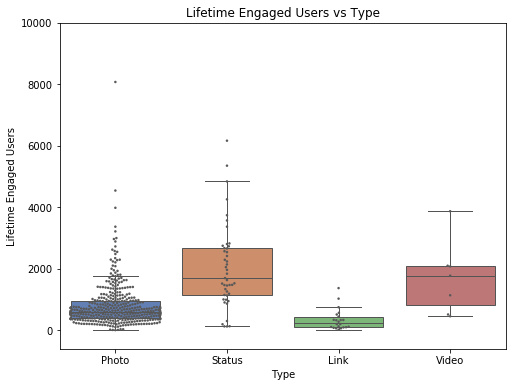

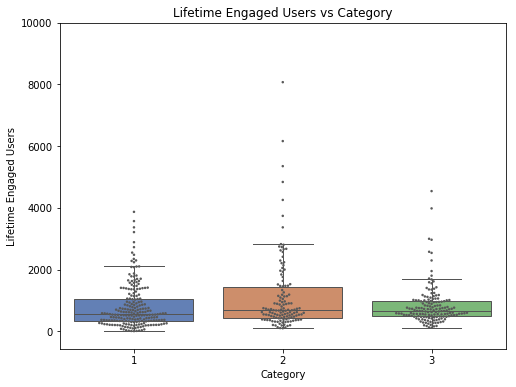

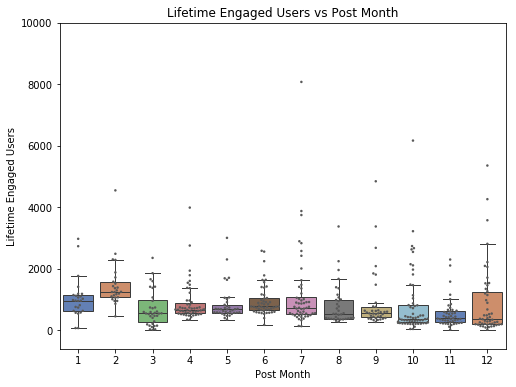

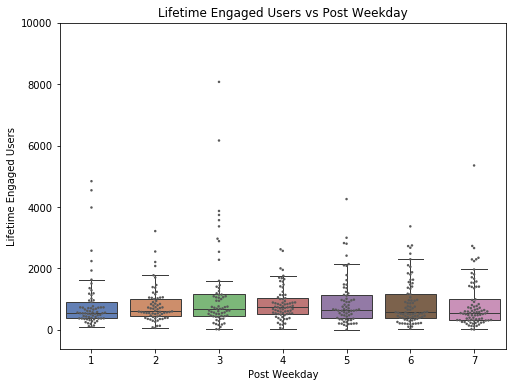

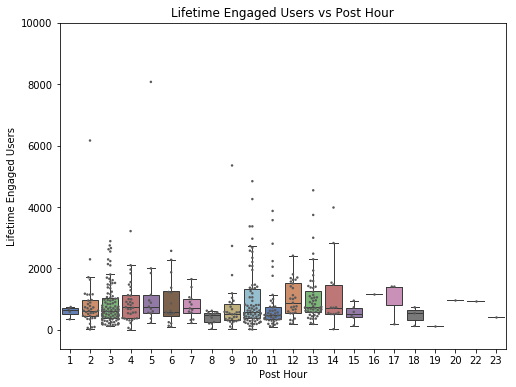

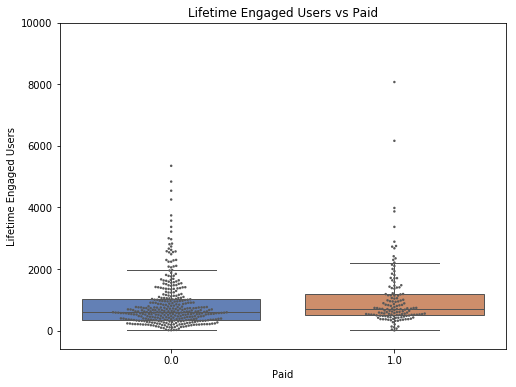

In [9]:
#visualize how attributes affect selected outcomes. ylimits are set to exclude extreme outliers for plot clarity
for outcome,ylimit in zip(selected_outcomes,[7000,10000]): 
    for col in ['Type','Category','Post Month','Post Weekday','Post Hour','Paid']:
        fig,ax  = plt.subplots(figsize=(8,6))
        sns.swarmplot(x=col,y=outcome,data=df, color='#595959', size=2.5) 
        sns.boxplot(x=col,y=outcome,data=df, fliersize=0, linewidth=1, palette = 'muted', saturation=0.6) 
        ax.set_ylim(top=ylimit) 
        plt.title("{} vs {}".format(outcome,col))

The trends observed for "Lifetime Post Consumers" and "Lifetime Engaged Users" are similar:
- 'Type': 'Status' and 'Video' posts appear to have better outcomes. There are however very few video posts so its impact on the outcome is not conclusive.
- 'Category': Posts of category 2 appear to do marginally better than the other categories
- 'Month': There is a lot of variability in the outcome for each month. Looking at the interquartile range alone, posts made in Jan and Feb appear to do better than the other months. However, there is a considerable number of outliers for other months which exceed the IQR of Jan-Feb. Based on the overall distribution, we could cluster 'Post Month' into the groups 1-2/3-5/6-8/9-12 
- 'Post Weekday': Does not appear to have significant impact on the two outcomes as distribution for different days of the week are similar
- 'Post Hour': There is some variability in outcomes for posts made at different hours. Based on the overall distribution, we could  cluster 'Post Hour' into the groups 1-7 / 8-11 / 12-15 / 16,19-23 (the last group is clustered together as there are few observations)
- 'Paid': Paid posts perform marginally better than unpaid posts. 


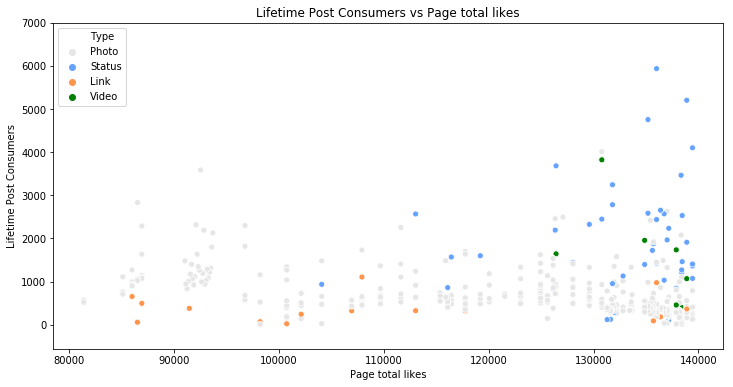

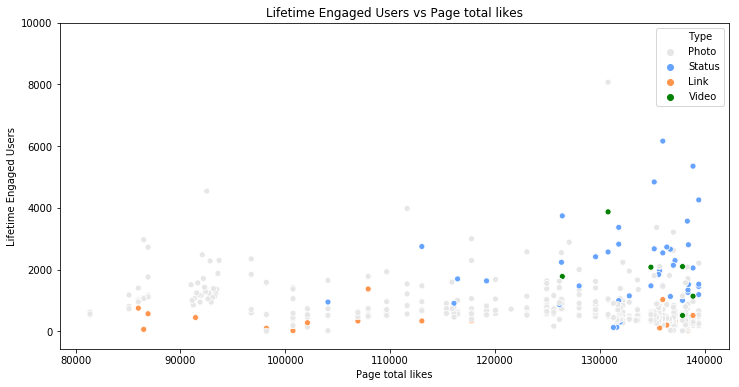

In [10]:
#visualize how 'Page total likes'and "Type" affect outcome variables (outliers not shown)
for outcome,ylimit in zip(selected_outcomes,[7000,10000]):
    palette = ['#e6e6e6', '#66a3ff','#ff944d','#008000']
    fig,ax  = plt.subplots(figsize=(12,6))
    fig = sns.scatterplot(x='Page total likes', y=outcome, data=df,hue="Type", palette=palette)
    ax.set_ylim(top=ylimit) #outliers greater than 7000 excluded for clarity
    plt.title("{} vs Page total likes".format(outcome,col))

There appears to be a positive correlation between 'Page total likes' and the two outcomes ("Lifetime Post Consumers" and "Lifetime Engaged Users") for posts of type 'Status'. 

For the posts of other types, there appears to weak or no correlation.


### Data cleaning/wrangling
#### Missing values

/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


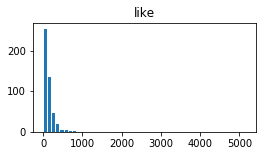

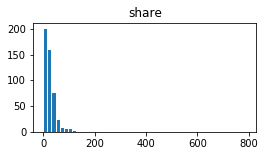

In [11]:
#visualize distribution of variables with missing values
for col in ['like','share']:
    plt.figure(figsize=(4,2))
    plt.hist(df[col], bins=50, edgecolor='white')
    plt.title(col)

In [12]:
df['Paid']=df['Paid'].astype('str')
df['Paid'].value_counts()

0.0    360
1.0    139
nan      1
Name: Paid, dtype: int64

Based on the distributions, 'Paid' will be filled with mode and 'like' and 'share' with the median

In [13]:
df['Paid'].replace('nan', df['Paid'].mode().item(), inplace=True)
for outcome in ['like','share']:
    df[outcome].fillna(df[outcome].median(), inplace=True)


#### Feature Engineering

There will potentially be many features as 'Post Hour', 'Post Month' and 'Post Weekday' are categorical. New features were created to group 'Post Hour', 'Post Month' and 'Post Weekday' values into clusters based on observations from the earlier visualizations

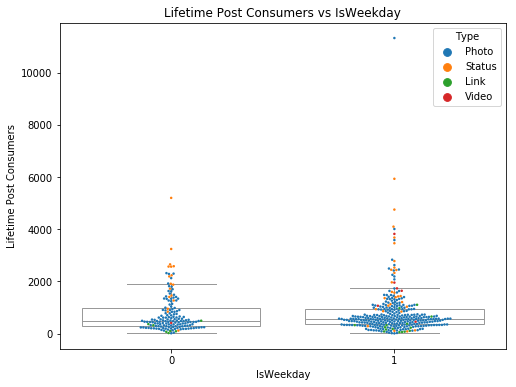

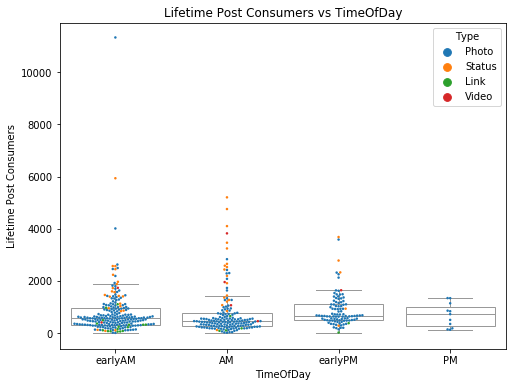

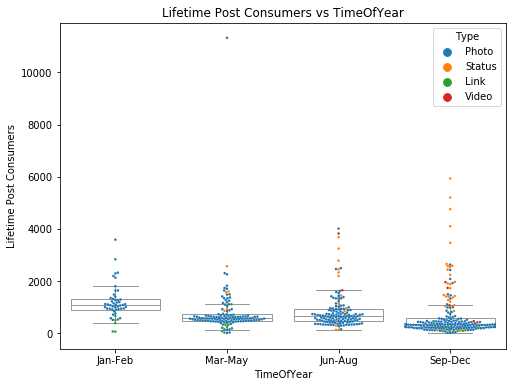

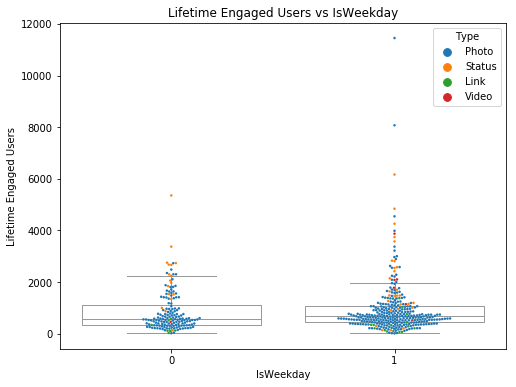

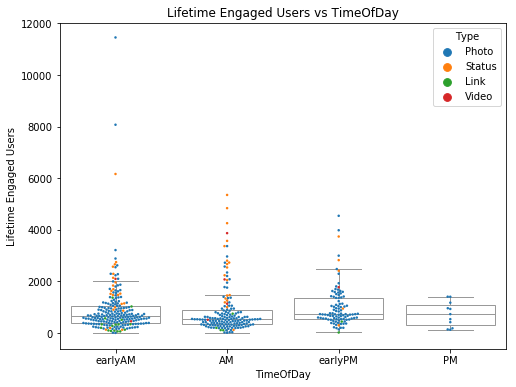

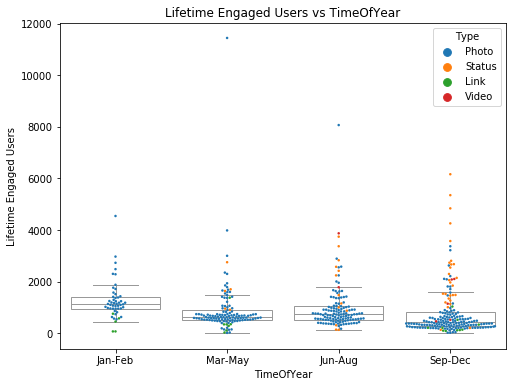

In [14]:
# Create feature denoting whether 'Post Weekday' is a weekday
df['IsWeekday'] = 1
df.loc[df['Post Weekday']>=6, 'IsWeekday']=0

# Bin 'Post Hour'  
df['TimeOfDay']=pd.cut(df['Post Hour'], bins=[1,8,12,16,24], right=False, labels=["earlyAM","AM",'earlyPM','PM'])

# Bin 'Post Month'
df['TimeOfYear']= pd.cut(df['Post Month'], bins=[1,3,6,9,13], right=False, labels=["Jan-Feb","Mar-May",'Jun-Aug',"Sep-Dec"])

# visualize how new features affect the 2 outcomes
for outcome in selected_outcomes:
    for attr in ['IsWeekday','TimeOfDay','TimeOfYear']:
        plt.figure(figsize=(8,6))
        sns.swarmplot(x = attr, y = outcome, data=df, hue = "Type", size=2.5)
        sns.boxplot(x=attr,y=outcome,data=df, fliersize=0, linewidth=1, color='white') 
        plt.title("{} vs {}".format(outcome,attr))

### Model training

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

#### Approach

A test set will be held out for model evaluation. 

On the training set, N-fold cross validation and grid search will be performed to optimize and select a model. The selected model will then be evaluated on its prediction accuracy on the held-out test set.

4 machine learning algorithms were considered: Linear Regression, Random Forest Regression, Lasso and Gradient Boosting Regression. The last 3 algorithms provide a means of minimizing overfitting and/or improving predictions on observations that are difficult to predict. These algorithms would be appropriate for this data set which has a large number of features compared to the number of observations.

Linear Regression is relatively simple to implement and is highly interpretable and so is included to compare its performance against the other 3 algorithms.

From the visualizations earlier, there were a few extreme outliers in the data. These will be removed as they will skew model performance and generalizability.

Most of the input variables are categorical and will be transformed to dummy variables. 'Page total likes', the only numerical input variable, will be scaled prior to model training so that it is of the same order of magnitude as the other input variables. This allows their coefficients in linear methods to be compared.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   500 non-null object
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-null

#### Lifetime Post Consumers

In [17]:
#create input and output variables for model training
for col in ['Category','Post Month','Post Weekday', 'Post Hour']:
    df[col] = df[col].astype('str')

outcome = "Lifetime Post Consumers"

  
def get_data(df, outcome):
   
    #exclude outliers
    Q3 = df[outcome].quantile(q=0.75)
    IQR = df[outcome].quantile(q=0.75) - df[outcome].quantile(q=0.25)
    df = df[df[outcome]<=Q3+(1.5*IQR)]

    input_var = ['Page total likes', 'Type', 'Category', 'TimeOfDay', 'Paid','IsWeekday', 'TimeOfYear']    
    X = df[input_var]

    cat_var = ['Type', 'Category', 'TimeOfDay', 'TimeOfYear'] 
    X = pd.get_dummies(X, columns=cat_var)
     
    y = df[outcome]
    
    return X,y

X,y = get_data(df, outcome)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=43)

##### Linear Regression

In [18]:
import warnings
warnings.filterwarnings("ignore")

def linear_regression(X_train,y_train):
    linear_pipeline = Pipeline([('scaler', MinMaxScaler()),('linear', LinearRegression())]) #scaling is done on the n-1 folds for

    scores = cross_validate(linear_pipeline, X_train,y_train, cv=KFold(n_splits = 5, random_state=77),
                                scoring=('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'))

    print("\nTraining:")
    print("MAE:{:.2f}".format(scores['train_neg_mean_absolute_error'].mean()))
    print("R2:{:.2f}".format(scores['train_r2'].mean()))
    print("RMSE:{:.2f}\n".format(scores['train_neg_mean_squared_error'].mean()))
    
    print("Cross Validation:")
    print("MAE:{:.2f}".format(scores['test_neg_mean_absolute_error'].mean()))
    print("R2:{:.2f}".format(scores['test_r2'].mean()))
    print("RMSE:{:.2f}\n".format(scores['test_neg_mean_squared_error'].mean()))
    
    return linear_pipeline.fit(X_train,y_train)

linear_model = linear_regression(X_train,y_train)


Training:
MAE:-227.29
R2:0.40
RMSE:-101215.56

Cross Validation:
MAE:-245.88
R2:0.25
RMSE:-123809.26



In [19]:
# define function to optimize models using gridsearchcv and print cross validation scores

def optimize_model(X_train,y_train, params, name, model):
    
    pipeline = Pipeline([('scaler', MinMaxScaler()),(name, model)]) #scaling is done on the n-1 folds for each cross-validation and model is trained, then nth fold is scaled according to the n-1
    
    #optimize model by minimizing mean absolute error
    tunedmodel = GridSearchCV(pipeline, params, cv=KFold(n_splits = 5, random_state=77), 
                                     scoring=['r2','neg_mean_absolute_error', 'neg_mean_squared_error'], 
                           refit="neg_mean_absolute_error")  #model is optimized by minimizing MAE
    
    tunedmodel.fit(X_train,y_train)

    #print mean training score for best model 
    print("\nTraining:")
    print("MAE = {:.2f}".format(tunedmodel.cv_results_['mean_train_neg_mean_absolute_error'][tunedmodel.best_index_]))
    print("R2 = {:.2f}".format(tunedmodel.cv_results_['mean_train_r2'][tunedmodel.best_index_]))
    print("RMSE = {:.2f}\n".format(tunedmodel.cv_results_['mean_train_neg_mean_squared_error'][tunedmodel.best_index_]))
    
    #print cross-validation score for best model 
    print("Cross validation: ")
    print("MAE = {:.2f}".format(tunedmodel.best_score_))
    print("R2 =  {:.2f}".format(tunedmodel.cv_results_['mean_test_r2'][tunedmodel.best_index_]))
    print("RMSE = {:.2f}\n".format(tunedmodel.cv_results_['mean_test_neg_mean_squared_error'][tunedmodel.best_index_]))
    print(tunedmodel.best_params_)
    
    return tunedmodel

##### Random Forest Regressor

In [20]:
rf = RandomForestRegressor(random_state=11)
rf_params = {'rf__n_estimators': np.arange(100,500,50), 'rf__max_features':np.arange(0.1,1,0.1), 
              'rf__min_samples_split':np.arange(2,10)}
    
rf_optimized = optimize_model(X_train,y_train, rf_params, 'rf', rf)


Training:
MAE = -159.23
R2 = 0.69
RMSE = -52551.40

Cross validation: 
MAE = -238.19
R2 =  0.29
RMSE = -117582.98

{'rf__max_features': 0.5, 'rf__min_samples_split': 7, 'rf__n_estimators': 400}


##### Lasso Regression

In [21]:
lasso = Lasso() 
lasso_params = {'lasso__alpha': np.linspace(0.1,10,100)}
lasso_optimized = optimize_model(X_train,y_train, lasso_params, 'lasso', lasso)


Training:
MAE = -229.31
R2 = 0.39
RMSE = -102708.49

Cross validation: 
MAE = -244.92
R2 =  0.27
RMSE = -121215.52

{'lasso__alpha': 2.0}


##### Gradient Boosting Regressor

In [22]:
gbr = GradientBoostingRegressor(random_state=13)
gbr_params = {'gbr__n_estimators': np.arange(100,300,20), 'gbr__max_features':np.arange(0.1,1,0.1), 
              'gbr__learning_rate':np.arange(0.01,0.1,0.01)}

gbr_optimized = optimize_model(X_train,y_train, gbr_params, 'gbr', gbr)


Training:
MAE = -176.35
R2 = 0.62
RMSE = -63890.12

Cross validation: 
MAE = -231.75
R2 =  0.31
RMSE = -113817.70

{'gbr__learning_rate': 0.03, 'gbr__max_features': 0.2, 'gbr__n_estimators': 240}


The training scores were much better than the cross validation scores which suggests that the models may be overfitting to the training folds.

Nevertheless, the optimized Gradient Boosting Regressor model was selected as the final model as it gave the best cross validation score and is likely to be a more robust model than the others. 

#### Lifetime Engaged Users
Model training was repeated for the output variable "Lifetime Engaged Users" using the same approach. 

In [23]:
outcome2 =  "Lifetime Engaged Users"

# get input and output data and split into train/test set
X2,y2 = get_data(df,outcome2) 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3, random_state=43)

#train different models and select based on best cross validation score
print("Linear Model")
linear_model2 = linear_regression(X2_train,y2_train)

print("\nRandom Forest")
rf2_params = {'rf__n_estimators': np.arange(100,500,50), 'rf__max_features':np.arange(0.1,1,0.1), 
              'rf__min_samples_split':np.arange(2,10)}  
rf2_optimized = optimize_model(X2_train,y2_train, rf2_params, 'rf', rf)

print("\nLasso")
lasso2_params = {'lasso__alpha': np.linspace(0.1,10,100)}
lasso2_optimized = optimize_model(X2_train,y2_train, lasso2_params, 'lasso', lasso)

print("\nGBR")
gbr2_params = {'gbr__n_estimators': np.arange(100,300,20), 'gbr__max_features':np.arange(0.1,1,0.1),
               'gbr__learning_rate':np.arange(0.01,0.1,0.01)}

gbr2_optimized = optimize_model(X2_train,y2_train, gbr2_params, 'gbr', gbr)

Linear Model

Training:
MAE:-263.01
R2:0.30
RMSE:-126479.25

Cross Validation:
MAE:-283.48
R2:0.15
RMSE:-152213.68


Random Forest

Training:
MAE = -201.77
R2 = 0.58
RMSE = -75778.99

Cross validation: 
MAE = -276.26
R2 =  0.17
RMSE = -147810.92

{'rf__max_features': 0.4, 'rf__min_samples_split': 8, 'rf__n_estimators': 400}

Lasso

Training:
MAE = -266.51
R2 = 0.28
RMSE = -130285.60

Cross validation: 
MAE = -279.15
R2 =  0.19
RMSE = -144790.67

{'lasso__alpha': 3.7}

GBR

Training:
MAE = -215.33
R2 = 0.52
RMSE = -85866.24

Cross validation: 
MAE = -270.39
R2 =  0.21
RMSE = -141207.36

{'gbr__learning_rate': 0.04, 'gbr__max_features': 0.6, 'gbr__n_estimators': 100}


For "Lifetime Engaged Users", Gradient Boosting Regression also gives the best cross validation score and will be used as the final model to predict for this outcome.

### Model Evaluation

The two models were evaluated based on their prediction accuracy on the held-out test set. 

Prediction accuracy using simple baseline models was also assessed (i.e. predictions were made using the training set's median outcome value - y_train.median( ) ). 

The extent by which the trained models improved prediction accuracy compared to baseline predictions could therefore be assessed.

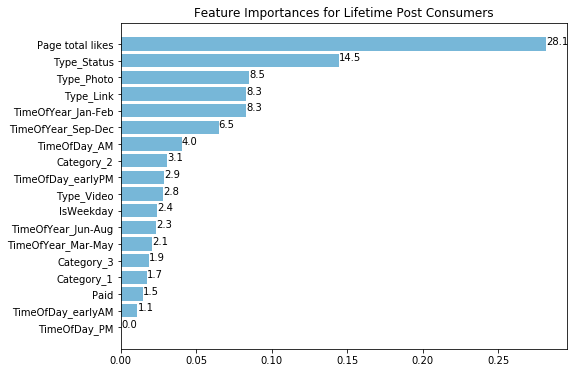

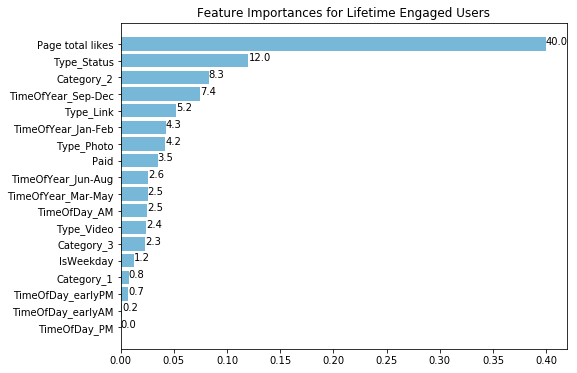

In [29]:
# visualize feature importances for trained models
consumers = pd.Series(gbr_optimized.best_estimator_.named_steps['gbr'].feature_importances_, index=X.columns).sort_values(ascending=False)
users = pd.Series(gbr2_optimized.best_estimator_.named_steps['gbr'].feature_importances_, index=X2.columns).sort_values(ascending=False)

for name,importance in zip([outcome, outcome2],[consumers,users]):
    fig, ax = plt.subplots(figsize=(8,6))
    ypos = np.arange(0,len(importance))[::-1]
    ax.barh(ypos,importance.values, color='#77B7D8')

    ax.set_yticks(ypos)
    ax.set_yticklabels(importance.index)

    for i,value in zip(ypos, importance.values):
        ax.annotate("{:.1f}".format(value*100), xy=(value, i))

    plt.title("Feature Importances for {}".format(name))

##### Lifetime Post Consumers
"Page total likes" has the largest feature importance. "Type" and posts made in Jan-Feb also have significant importance in the trained model.

##### Lifetime Engaged Users
"Page total likes" has the largest feature importance. "Type_Status" and "Category_2" also feature strongly, as well as posts made in Sep-Dec. 

Test performance (Lifetime Post Consumers):
MAE:207.46, R2:0.38, MSE:87835.71
MAE Percentage 63.69

Test performance (Lifetime Engaged Users):
MAE:245.35, R2:0.40, MSE:121735.84
MAE Percentage 69.68



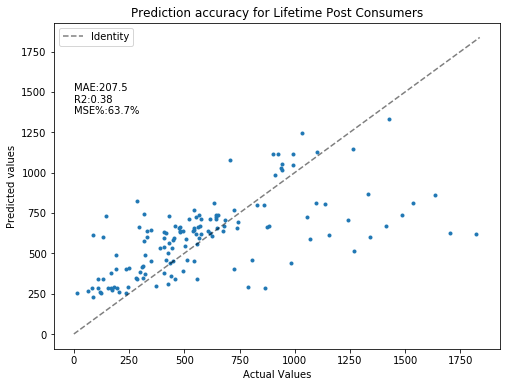

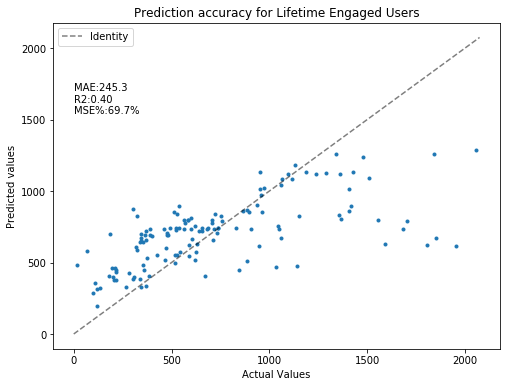

In [30]:
# evaluate and visualize trained model performance using held out test set
def evaluate_model(model,X_test,y_test, outcome):
    y_pred = model.predict(X_test)
    
    #get performance metrics
    MSE = mean_squared_error(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)
    mse_percent = sum((abs(y_test - y_pred)/y_test)*100/len(y_test))
    
    print("Test performance ({}):\nMAE:{:.2f}, R2:{:.2f}, MSE:{:.2f}".format(outcome,MAE,R2,MSE))
    print("MAE Percentage {:.2f}\n".format(mse_percent))
    
    #visualize model performance
    max_scale = max(y_test.max(),y_pred.max())
    
    fig, ax = plt.subplots(figsize = (8,6))
    plt.scatter(y_test, y_pred, marker='.')
    plt.plot(np.arange(0,max_scale*1.01), np.arange(0,max_scale*1.01), 'k--', alpha=0.5, label = "Identity")
    
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted values")
    ax.set_title("Prediction accuracy for {}".format(outcome))
    plt.legend()
    ax.text(0,max_scale*0.8,"MAE:{:.1f}\nR2:{:.2f}\nMSE%:{:.1f}%".format(MAE,R2, mse_percent), va="center", ha="left")
    
evaluate_model(gbr_optimized,X_test,y_test, outcome) #evaluate model performance for "Lifetime Post Consumers"
evaluate_model(gbr2_optimized,X2_test,y2_test, outcome2) #evaluate model performance for "Lifetime Engaged Users"

Accuracy if using median y_train as baseline prediction (Lifetime Engaged Users):
MAE:281.56, R2:-0.04, MSE:147588.38
MAE Percentage 98.44

Accuracy if using median y_train as baseline prediction (Lifetime Engaged Users):
MAE:350.18, R2:-0.10, MSE:224659.91
MAE Percentage 91.73



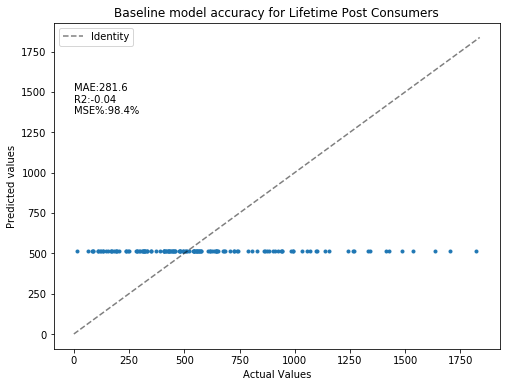

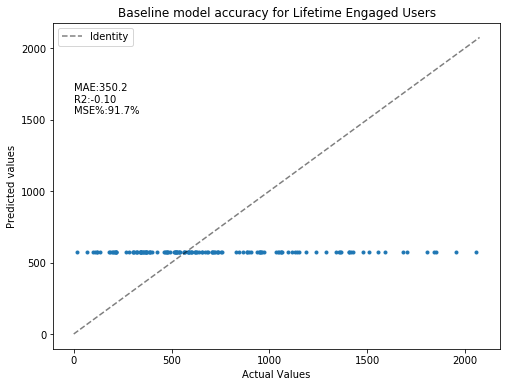

In [31]:
#evaluate and visualize performance of baseline model on held-out test set
def evaluate_baseline(y_test, outcome, median):
    
    y_pred = np.ones(len(y_test)) * median #predicts all outcomes in test set to be equal to the mode in training set
    
    #get performance metrics
    MSE = mean_squared_error(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)
    mse_percent = sum((abs(y_test - y_pred)/y_test)*100/len(y_test))
    
    print("Accuracy if using median y_train as baseline prediction ({}):\nMAE:{:.2f}, R2:{:.2f}, MSE:{:.2f}".
          format(name,MAE,R2,MSE))
    print("MAE Percentage {:.2f}\n".format(mse_percent))
    
    #visualize performance
    max_scale = y_test.max()
    
    fig, ax = plt.subplots(figsize = (8,6))
    plt.scatter(y_test, y_pred, marker='.')
    plt.plot(np.arange(0,max_scale*1.01), np.arange(0,max_scale*1.01), 'k--', alpha=0.5, label = "Identity")
    
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted values")
    ax.set_title("Baseline model accuracy for {}".format(outcome))
    plt.legend()
    ax.text(0,max_scale*0.8,"MAE:{:.1f}\nR2:{:.2f}\nMSE%:{:.1f}%".format(MAE,R2, mse_percent), va="center", ha="left")
    
evaluate_baseline(y_test,outcome, y_train.median())
evaluate_baseline(y2_test,outcome2, y2_train.median())

### Conclusions

The models developed for the two outcomes did not do too well, with mean absolute error percentages as follows:
- "Lifetime Post Consumers": 63.7%
- "Lifetime Engaged Users": 70.0% 

R2 scores were also low at 0.38-0.4. 

From the plots, prediction error is larger for higher outcome values. Using a larger training data set that comprises more observations of this range of values would probably improve model performance. 


While the predicted values obtained from the two models are quite far off the mark, they still provide a more accurate estimate than the baseline models i.e. compared to the baseline models, the trained models reduced the mean absolute percentage error by 21-35%

#### References
1. (https://scikit-learn.org/stable/)